In [1]:
import os
os.chdir("../")

import pickle

from visualization import Visualization

In [2]:
project = 'rehersal ResNet CIFAR10 Task IL Learning Rate'


viz = Visualization(project=project,UID=['rehearsal_dataset', 'batch_size_rehearsal', 'pretraining', 'learning_rate', 'epochs', 'separate_noise_output'], y_min=30)

In [3]:
viz.extract_all_runs_metrics_after_task_3()

In [4]:
viz.metrics_df

UID  acc_at_the_end_task_0  acc_mean_task_0  \
0            ;128;False;1e-06;5;None;              50.500000        50.043750   
1            ;128;False;1e-06;5;None;              51.849998        51.057500   
2            ;128;False;1e-06;5;None;              48.549999        49.376667   
3            ;128;False;1e-06;5;None;              54.700001        54.473333   
4            ;128;False;3e-05;5;None;              58.150002        57.114167   
5            ;128;False;1e-05;5;None;              52.750000        52.933333   
6            ;128;False;1e-05;5;None;              59.599998        58.867500   
7            ;128;False;3e-05;5;None;              64.949997        62.521667   
8            ;128;False;1e-05;5;None;              53.450001        53.047500   
9            ;128;False;1e-05;5;None;              51.400002        50.265833   
10           ;128;False;3e-05;5;None;              53.900002        53.720417   
11           ;128;False;3e-05;5;None;              53.900002        54.065416   
12           ;128;False;3e-06;5;None;              61.400002        58.274167   
13           ;128;False;3e-06;5;None;              53.950001        54.369167   
14           ;128;False;3e-06;5;None;              49.750000        49.221250   
15           ;128;False;3e-06;5;None;              52.299999        51.695417   
16   stat-wmm;128;False;0.003;5;None;              69.300003        68.380833   
17    stat-wmm;128;False;0.03;5;None;              67.400002        75.907916   
18    stat-wmm;128;False;0.01;5;None;              80.150002        82.489583   
19  stat-wmm;128;False;0.0001;5;None;              63.150002        60.354583   
20  stat-wmm;128;False;0.0002;5;None;              79.000000        75.770000   
21   stat-wmm;128;False;0.001;5;None;              66.300003        66.235834   
22            ;128;False;0.03;5;None;              80.650002        86.842500   
23            ;128;False;0.01;5;None;              82.099998        85.283750   
24           ;128;False;0.003;5;None;              88.349998        87.231250   
25           ;128;False;0.001;5;None;              69.300003        69.141666   
26          ;128;False;0.0003;5;None;              65.400002        65.043750   
27          ;128;False;0.0001;5;None;              74.449997        70.569167   
28     stat-wmm;128;True;0.03;5;None;              56.849998        64.189583   
29     stat-wmm;128;True;0.01;5;None;              69.300003        69.447083   
30    stat-wmm;128;True;0.003;5;None;              85.150002        83.644999   
31    stat-wmm;128;True;0.001;5;None;              80.949997        79.061250   
32   stat-wmm;128;True;0.0003;5;None;              67.449997        68.450000   
33   stat-wmm;128;True;0.0001;5;None;              59.500000        59.301250   

    acc_mean_decrease_per_task_0   acc_max0   acc_min0  acc_at_the_end_task_1  \
0                       0.125000  51.000000  47.049999              50.400002   
1                       0.225000  52.750000  49.299999              50.650002   
2                       0.525001  50.650002  47.750000              48.599998   
3                       0.262500  55.750000  49.200001              51.200001   
4                       0.137500  58.700001  51.650002              66.699997   
5                       0.637500  55.299999  48.799999              55.299999   
6                       0.437500  61.349998  49.000000              55.250000   
7                       0.137501  65.500000  52.849998              53.150002   
8                       0.450000  55.250000  49.000000              53.700001   
9                       0.137500  51.950001  48.099998              50.200001   
10                      0.424999  55.599998  49.700001              60.000000   
11                      0.862499  57.349998  49.000000              52.799999   
12                      0.025000  61.500000  50.000000              44.150002   
13                      0.762500  57.000000  37.200001          

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def box_plot(metric_name, df, filename=None, fontsize=20):
    UIDS = df['UID'].unique()

    values = []
    for uid in UIDS:
        values.append(df[df['UID'] == uid][metric_name].median())

    order = np.argsort(values)
    UIDS = UIDS[order]

    plt.figure(figsize=(20, 10))
    for i, uid in enumerate(UIDS):
        plt.boxplot(df[df['UID'] == uid][metric_name], positions=[i], widths=0.6)

    labels = UIDS
    labels = [f"{uid.split(';')[0]} {uid.split(';')[3]} {uid.split(';')[2]}" for uid in UIDS]

    plt.xticks(np.arange(len(UIDS)), labels, rotation=90, fontsize=fontsize)
    plt.yticks(fontsize=fontsize)  # Add this line to set the font size of the y-axis
    plt.title(f"metric: {metric_name}", fontsize=fontsize)
    plt.xlabel("unique identifier", fontsize=fontsize)
    plt.ylabel("accuracy [%]", fontsize=fontsize)

    if filename:
        plt.savefig("images/"+filename+".pdf", format='pdf', bbox_inches='tight')
        plt.savefig("images/"+filename+".svg", format='svg', bbox_inches='tight')

UID  acc_at_the_end_task_0  acc_mean_task_0  \
0            ;128;False;1e-06;5;None;              50.500000        50.043750   
1            ;128;False;1e-06;5;None;              51.849998        51.057500   
2            ;128;False;1e-06;5;None;              48.549999        49.376667   
3            ;128;False;1e-06;5;None;              54.700001        54.473333   
4            ;128;False;3e-05;5;None;              58.150002        57.114167   
5            ;128;False;1e-05;5;None;              52.750000        52.933333   
6            ;128;False;1e-05;5;None;              59.599998        58.867500   
7            ;128;False;3e-05;5;None;              64.949997        62.521667   
8            ;128;False;1e-05;5;None;              53.450001        53.047500   
9            ;128;False;1e-05;5;None;              51.400002        50.265833   
10           ;128;False;3e-05;5;None;              53.900002        53.720417   
11           ;128;False;3e-05;5;None;              53.900002        54.065416   
12           ;128;False;3e-06;5;None;              61.400002        58.274167   
13           ;128;False;3e-06;5;None;              53.950001        54.369167   
14           ;128;False;3e-06;5;None;              49.750000        49.221250   
15           ;128;False;3e-06;5;None;              52.299999        51.695417   
16   stat-wmm;128;False;0.003;5;None;              69.300003        68.380833   
17    stat-wmm;128;False;0.03;5;None;              67.400002        75.907916   
18    stat-wmm;128;False;0.01;5;None;              80.150002        82.489583   
19  stat-wmm;128;False;0.0001;5;None;              63.150002        60.354583   
20  stat-wmm;128;False;0.0002;5;None;              79.000000        75.770000   
21   stat-wmm;128;False;0.001;5;None;              66.300003        66.235834   
22            ;128;False;0.03;5;None;              80.650002        86.842500   
23            ;128;False;0.01;5;None;              82.099998        85.283750   
24           ;128;False;0.003;5;None;              88.349998        87.231250   
25           ;128;False;0.001;5;None;              69.300003        69.141666   
26          ;128;False;0.0003;5;None;              65.400002        65.043750   
27          ;128;False;0.0001;5;None;              74.449997        70.569167   
28     stat-wmm;128;True;0.03;5;None;              56.849998        64.189583   
29     stat-wmm;128;True;0.01;5;None;              69.300003        69.447083   
30    stat-wmm;128;True;0.003;5;None;              85.150002        83.644999   
31    stat-wmm;128;True;0.001;5;None;              80.949997        79.061250   
32   stat-wmm;128;True;0.0003;5;None;              67.449997        68.450000   
33   stat-wmm;128;True;0.0001;5;None;              59.500000        59.301250   

    acc_mean_decrease_per_task_0   acc_max0   acc_min0  acc_at_the_end_task_1  \
0                       0.125000  51.000000  47.049999              50.400002   
1                       0.225000  52.750000  49.299999              50.650002   
2                       0.525001  50.650002  47.750000              48.599998   
3                       0.262500  55.750000  49.200001              51.200001   
4                       0.137500  58.700001  51.650002              66.699997   
5                       0.637500  55.299999  48.799999              55.299999   
6                       0.437500  61.349998  49.000000              55.250000   
7                       0.137501  65.500000  52.849998              53.150002   
8                       0.450000  55.250000  49.000000              53.700001   
9                       0.137500  51.950001  48.099998              50.200001   
10                      0.424999  55.599998  49.700001              60.000000   
11                      0.862499  57.349998  49.000000              52.799999   
12                      0.025000  61.500000  50.000000              44.150002   
13                      0.762500  57.000000  37.200001          

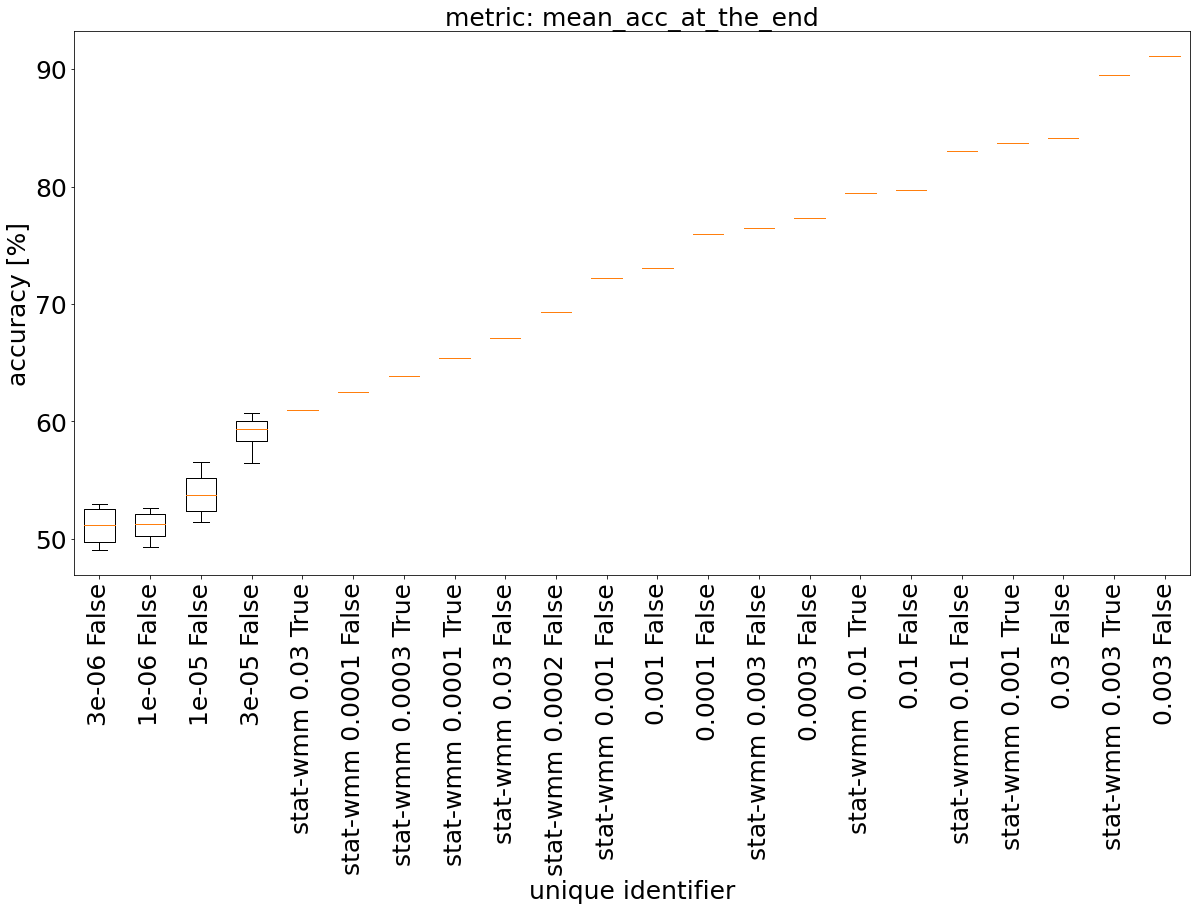

In [6]:
df = viz.metrics_df.copy()

# df = df[(df['learning_rate']=='0.003') & (df['epochs']=='5') & (df['separate_noise_output'].isin(['nan', 'None'])) & (df['batch_size_rehearsal']=='128')]

# metric = 'acc_at_the_end_task_0'
metric = 'mean_acc_at_the_end'
box_plot(metric, df, f"learning_rate_box_dataset_resnet18_no_separate_{metric}", 25)

df

# All runs

In [7]:
df

UID  acc_at_the_end_task_0  acc_mean_task_0  \
0            ;128;False;1e-06;5;None;              50.500000        50.043750   
1            ;128;False;1e-06;5;None;              51.849998        51.057500   
2            ;128;False;1e-06;5;None;              48.549999        49.376667   
3            ;128;False;1e-06;5;None;              54.700001        54.473333   
4            ;128;False;3e-05;5;None;              58.150002        57.114167   
5            ;128;False;1e-05;5;None;              52.750000        52.933333   
6            ;128;False;1e-05;5;None;              59.599998        58.867500   
7            ;128;False;3e-05;5;None;              64.949997        62.521667   
8            ;128;False;1e-05;5;None;              53.450001        53.047500   
9            ;128;False;1e-05;5;None;              51.400002        50.265833   
10           ;128;False;3e-05;5;None;              53.900002        53.720417   
11           ;128;False;3e-05;5;None;              53.900002        54.065416   
12           ;128;False;3e-06;5;None;              61.400002        58.274167   
13           ;128;False;3e-06;5;None;              53.950001        54.369167   
14           ;128;False;3e-06;5;None;              49.750000        49.221250   
15           ;128;False;3e-06;5;None;              52.299999        51.695417   
16   stat-wmm;128;False;0.003;5;None;              69.300003        68.380833   
17    stat-wmm;128;False;0.03;5;None;              67.400002        75.907916   
18    stat-wmm;128;False;0.01;5;None;              80.150002        82.489583   
19  stat-wmm;128;False;0.0001;5;None;              63.150002        60.354583   
20  stat-wmm;128;False;0.0002;5;None;              79.000000        75.770000   
21   stat-wmm;128;False;0.001;5;None;              66.300003        66.235834   
22            ;128;False;0.03;5;None;              80.650002        86.842500   
23            ;128;False;0.01;5;None;              82.099998        85.283750   
24           ;128;False;0.003;5;None;              88.349998        87.231250   
25           ;128;False;0.001;5;None;              69.300003        69.141666   
26          ;128;False;0.0003;5;None;              65.400002        65.043750   
27          ;128;False;0.0001;5;None;              74.449997        70.569167   
28     stat-wmm;128;True;0.03;5;None;              56.849998        64.189583   
29     stat-wmm;128;True;0.01;5;None;              69.300003        69.447083   
30    stat-wmm;128;True;0.003;5;None;              85.150002        83.644999   
31    stat-wmm;128;True;0.001;5;None;              80.949997        79.061250   
32   stat-wmm;128;True;0.0003;5;None;              67.449997        68.450000   
33   stat-wmm;128;True;0.0001;5;None;              59.500000        59.301250   

    acc_mean_decrease_per_task_0   acc_max0   acc_min0  acc_at_the_end_task_1  \
0                       0.125000  51.000000  47.049999              50.400002   
1                       0.225000  52.750000  49.299999              50.650002   
2                       0.525001  50.650002  47.750000              48.599998   
3                       0.262500  55.750000  49.200001              51.200001   
4                       0.137500  58.700001  51.650002              66.699997   
5                       0.637500  55.299999  48.799999              55.299999   
6                       0.437500  61.349998  49.000000              55.250000   
7                       0.137501  65.500000  52.849998              53.150002   
8                       0.450000  55.250000  49.000000              53.700001   
9                       0.137500  51.950001  48.099998              50.200001   
10                      0.424999  55.599998  49.700001              60.000000   
11                      0.862499  57.349998  49.000000              52.799999   
12                      0.025000  61.500000  50.000000              44.150002   
13                      0.762500  57.000000  37.200001          

In [8]:
viz.runs_params_settings_idxs_dict

{';128;False;1e-06;5;None': [0, 1, 2, 3],
 ';128;False;3e-05;5;None': [4, 7, 10, 11],
 ';128;False;1e-05;5;None': [5, 6, 8, 9],
 ';128;False;3e-06;5;None': [12, 13, 14, 15],
 'stat-wmm;128;False;0.003;5;None': [16],
 'stat-wmm;128;False;0.03;5;None': [17],
 'stat-wmm;128;False;0.01;5;None': [18],
 'stat-wmm;128;False;0.0001;5;None': [19],
 'stat-wmm;128;False;0.0002;5;None': [20],
 'stat-wmm;128;False;0.001;5;None': [21],
 ';128;False;0.03;5;None': [22],
 ';128;False;0.01;5;None': [23],
 ';128;False;0.003;5;None': [24],
 ';128;False;0.001;5;None': [25],
 ';128;False;0.0003;5;None': [26],
 ';128;False;0.0001;5;None': [27],
 'stat-wmm;128;True;0.03;5;None': [28],
 'stat-wmm;128;True;0.01;5;None': [29],
 'stat-wmm;128;True;0.003;5;None': [30],
 'stat-wmm;128;True;0.001;5;None': [31],
 'stat-wmm;128;True;0.0003;5;None': [32],
 'stat-wmm;128;True;0.0001;5;None': [33]}

c:\Users\QbaSo\PycharmProjects\mgr\myCode\Results visualization\visualization.py:404: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(metrics_df.to_latex(index=False))


\begin{tabular}{rrrrl}
\toprule
 task &  acc at the end &  mean acc &  acc loss per task & split \\
\midrule
    0 &           74.45 &     70.57 &               0.43 &  test \\
    1 &           72.00 &     67.22 &               0.83 &  test \\
    2 &           81.40 &     64.36 &               0.00 &  test \\
    3 &           52.65 &     52.69 &               1.25 &  test \\
    4 &           44.35 &     44.05 &               0.00 &  test \\
\bottomrule
\end{tabular}



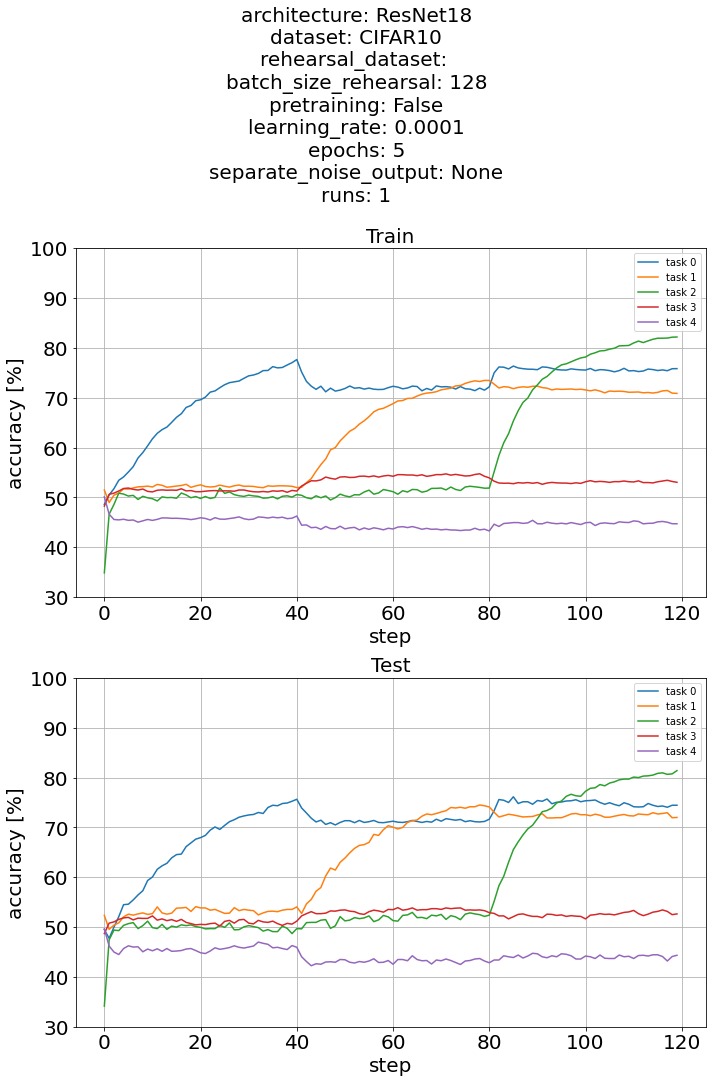

In [9]:
setup_name = 'stat-wmm;128;True;0.0001;5;None'
setup_name = ';128;False;0.0001;5;None'
viz.plot_single_setting_aggregated(setup_name, 20, filename=setup_name, layout='vertical_short', plot_till=3/5)

c:\Users\QbaSo\PycharmProjects\mgr\myCode\Results visualization\visualization.py:314: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(2, 2, tight_layout=True)


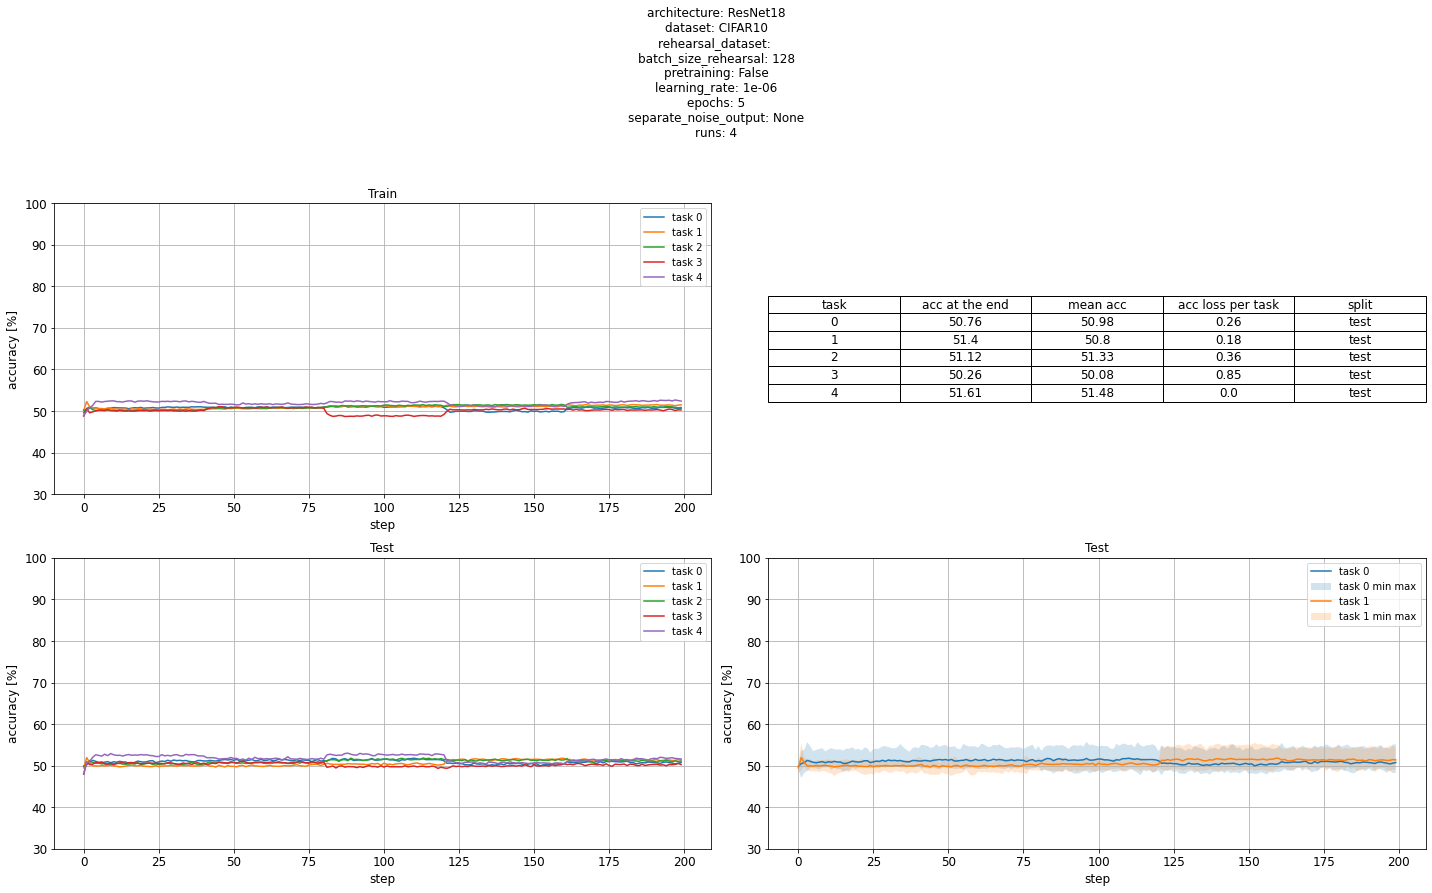

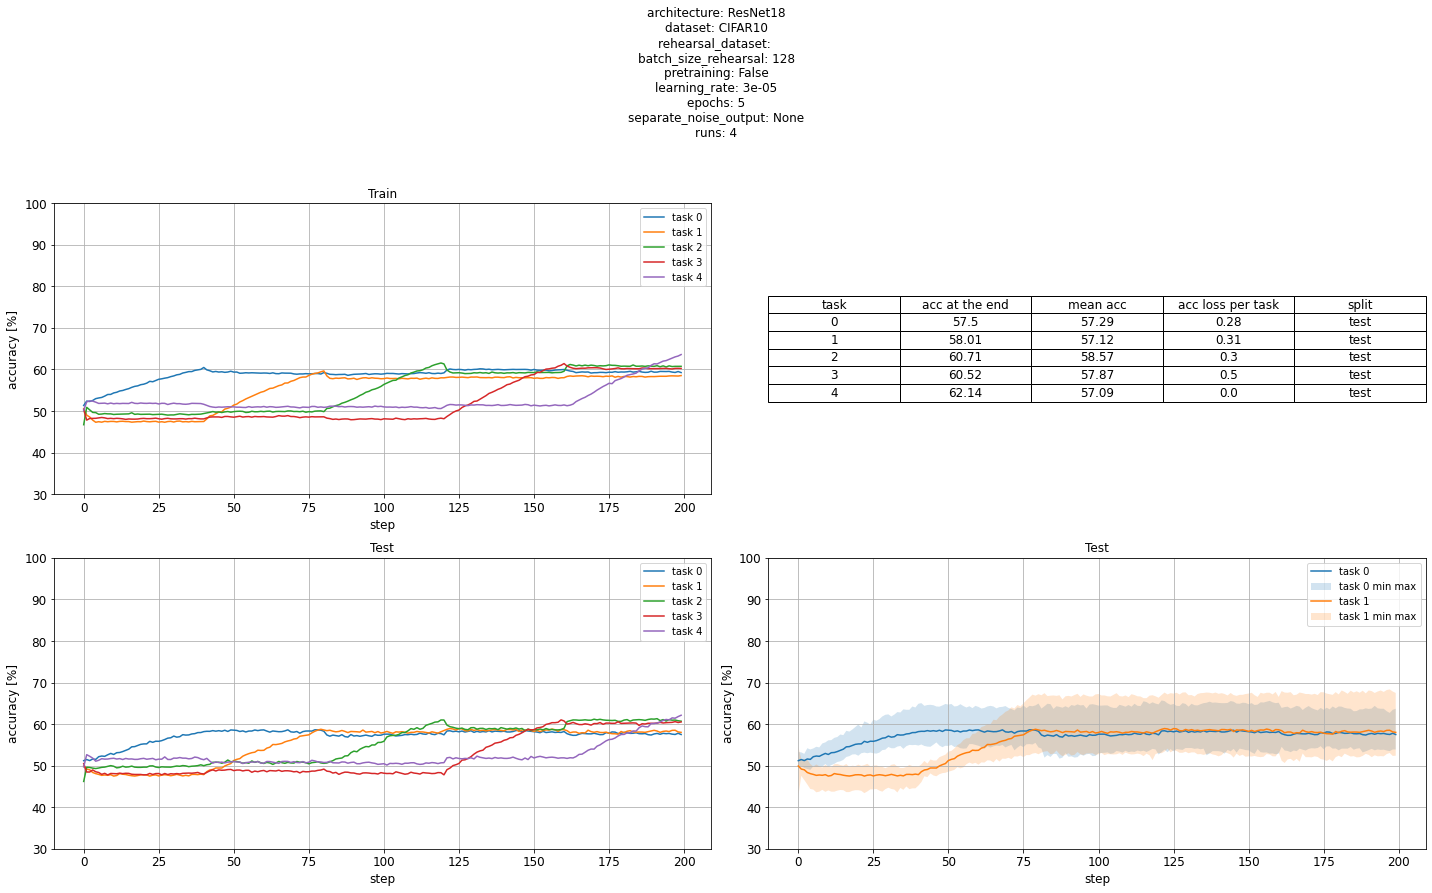

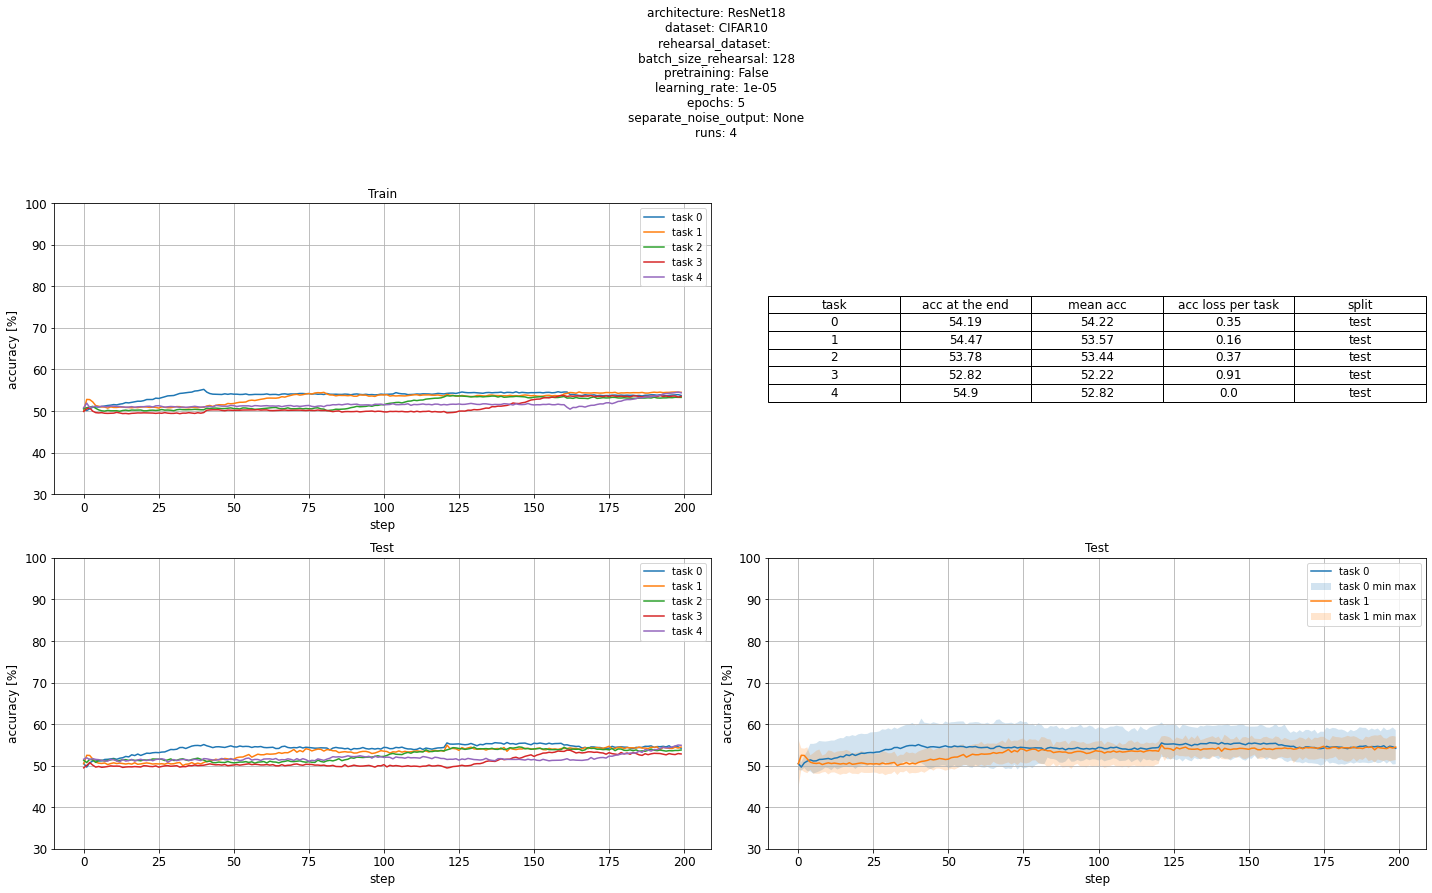

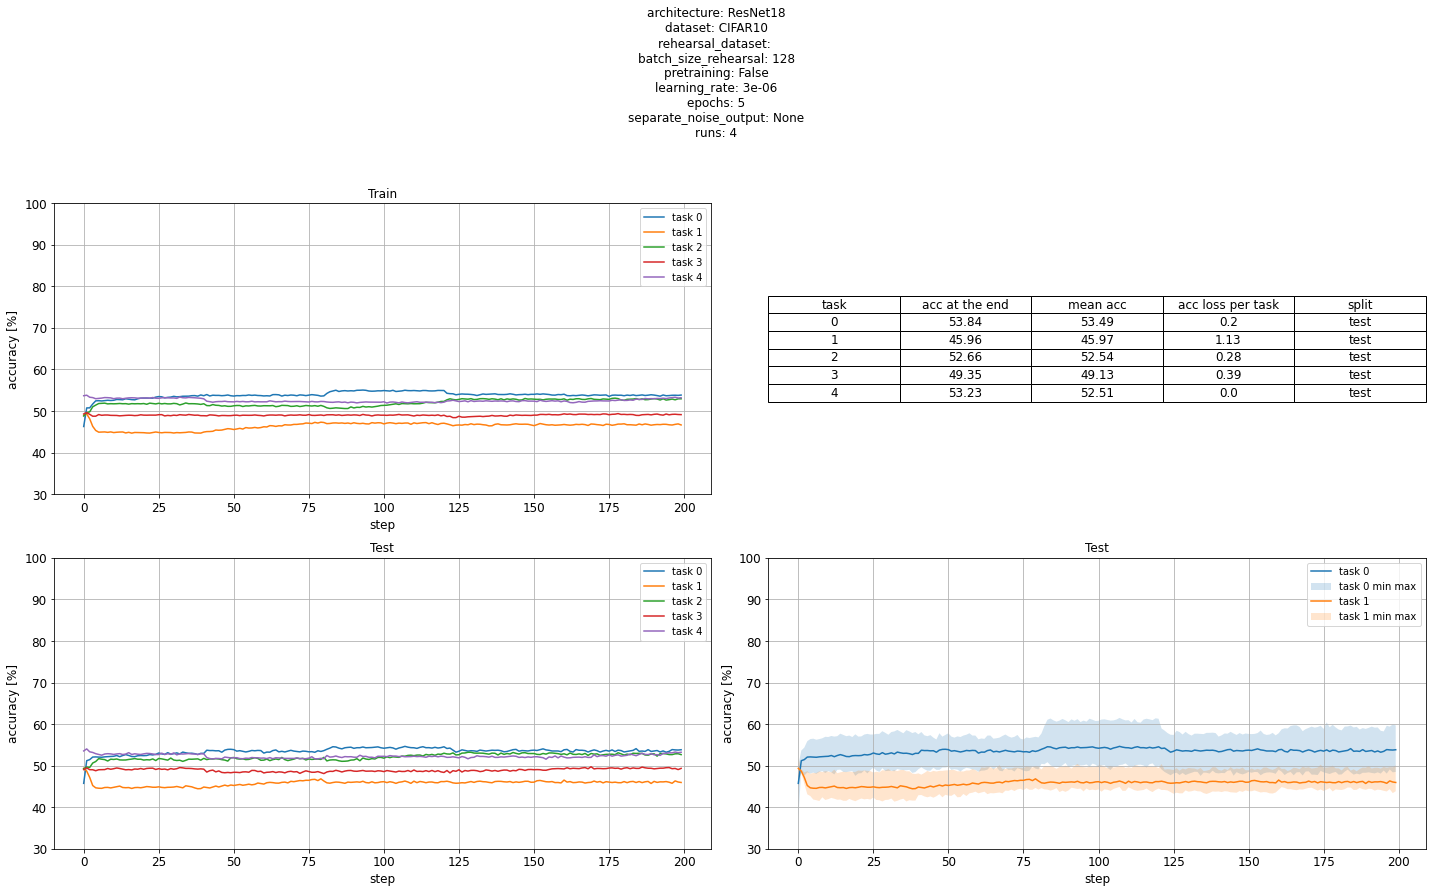

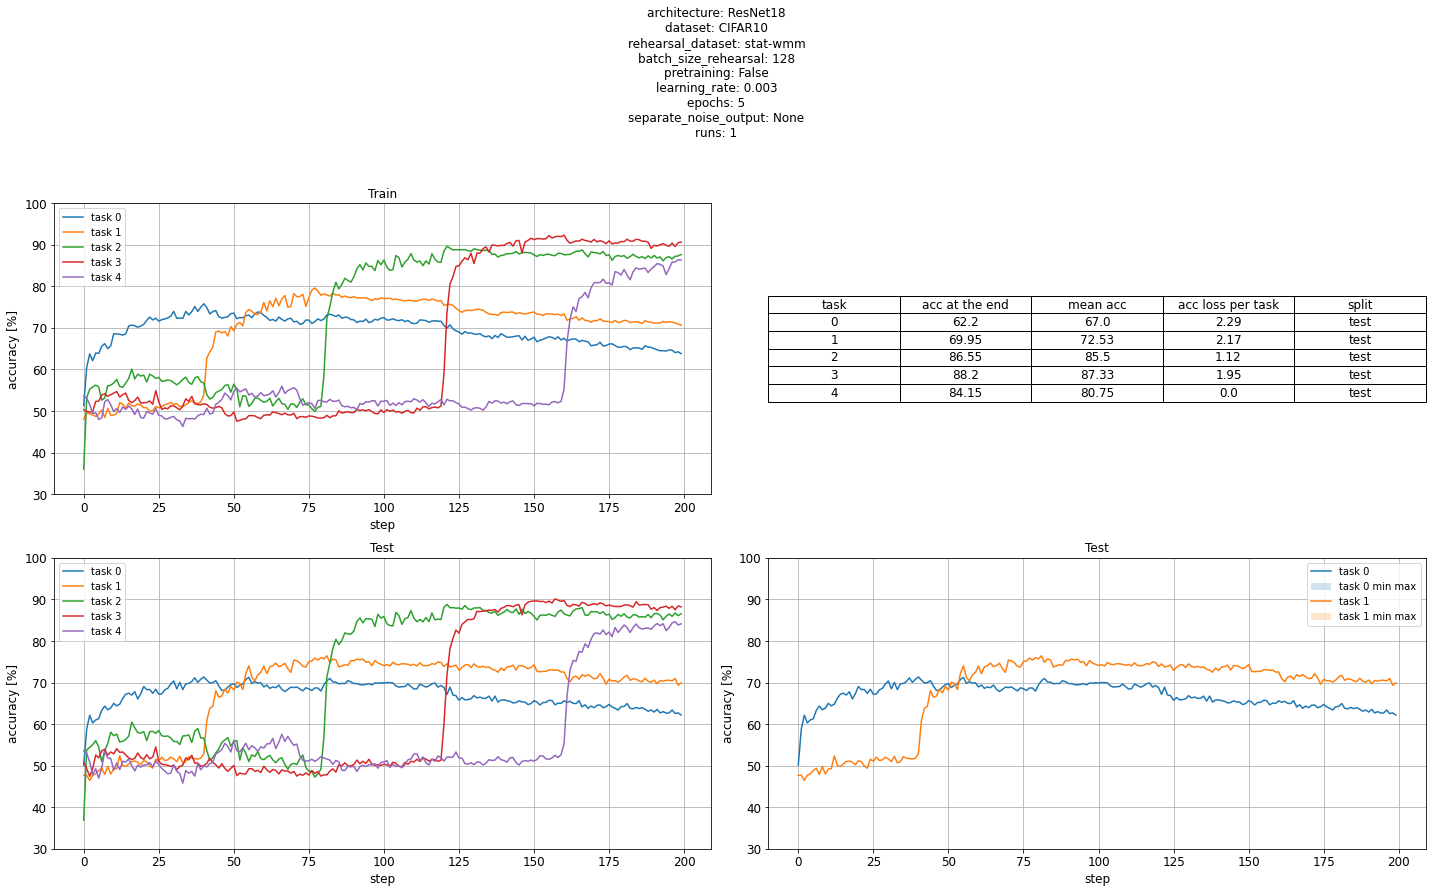

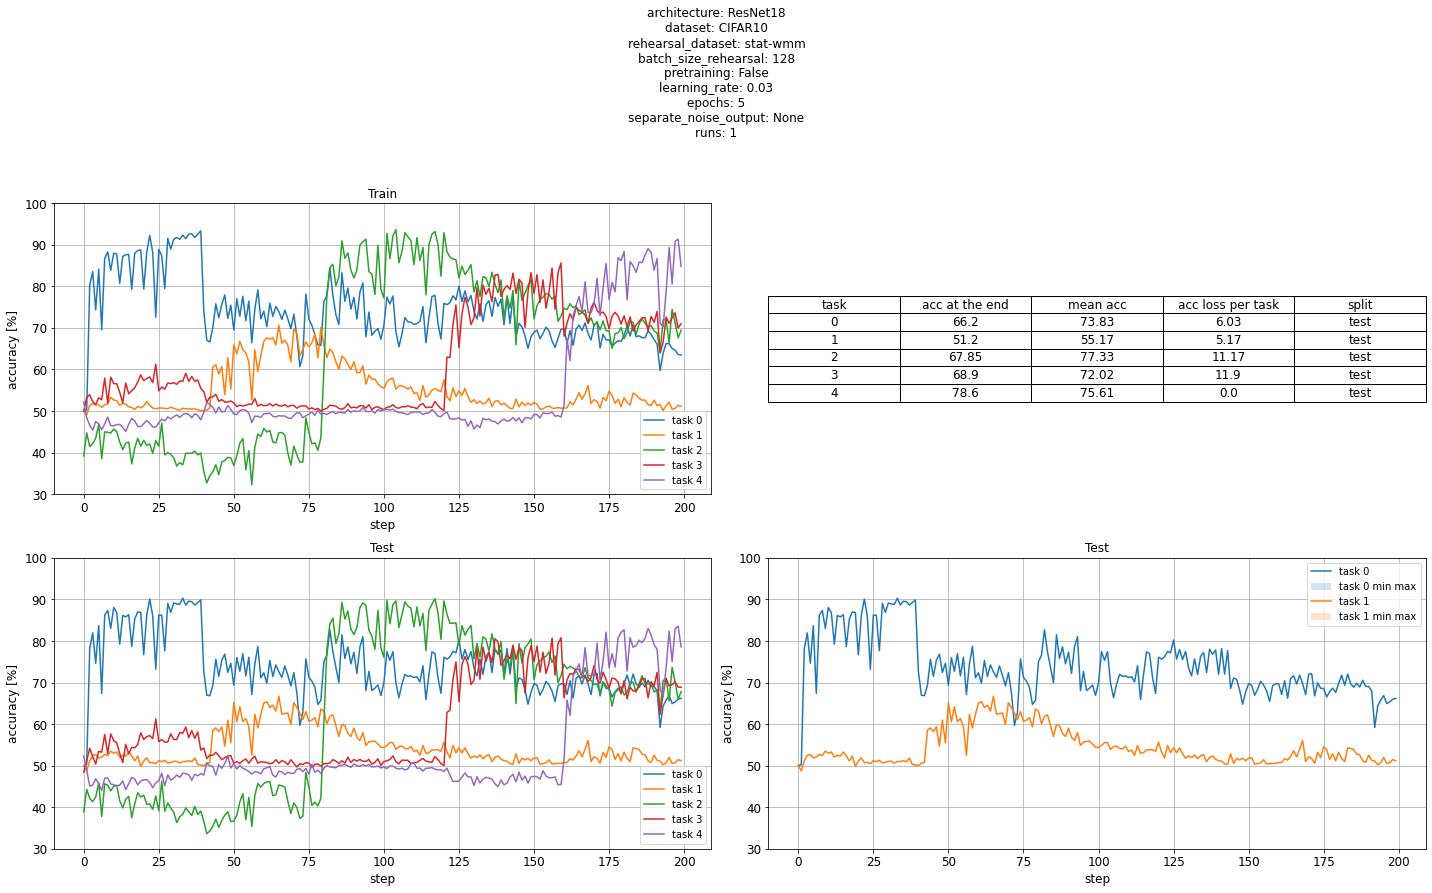

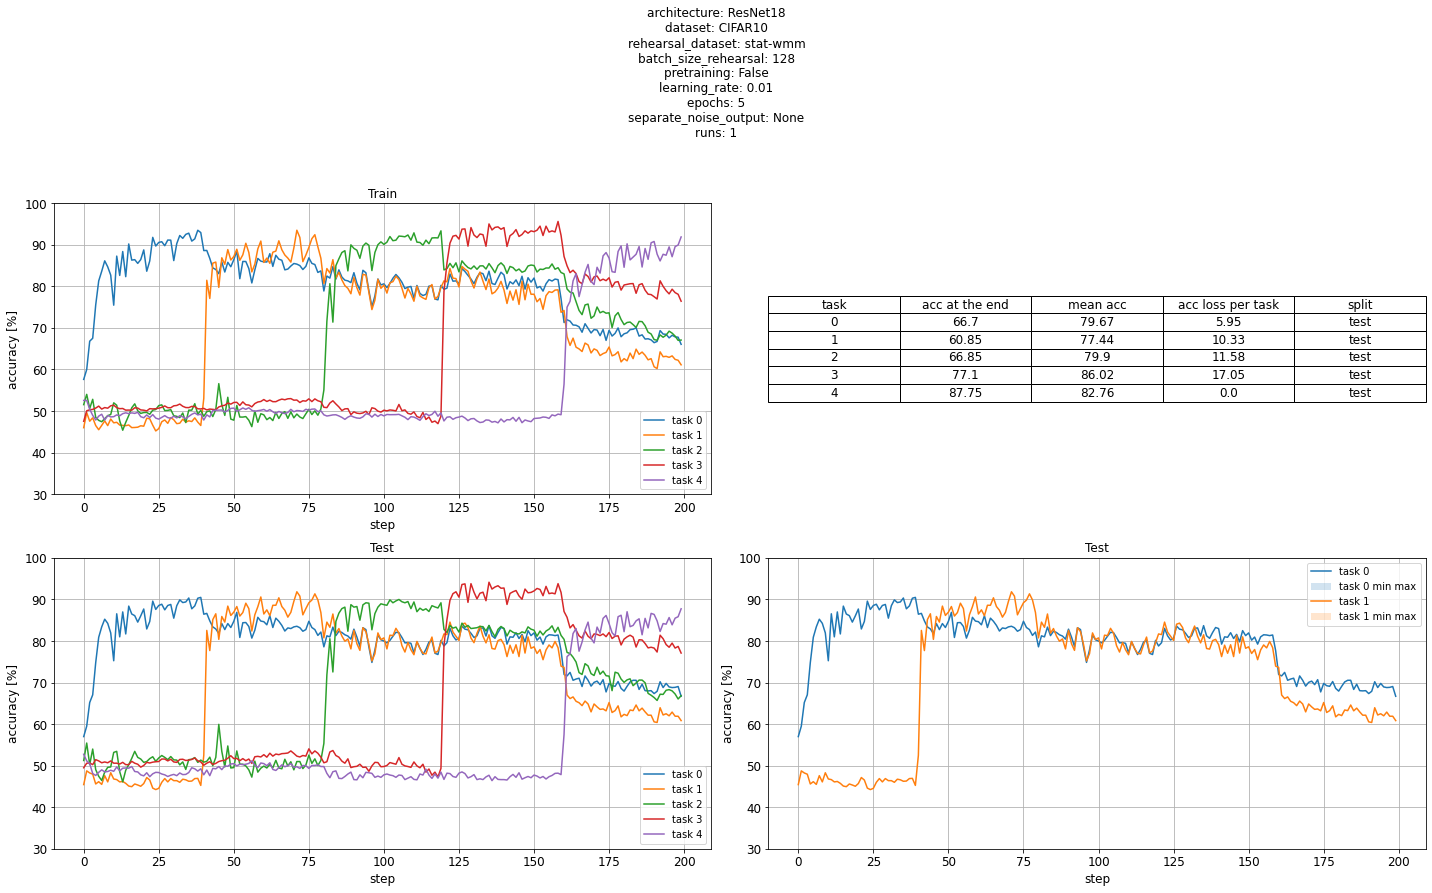

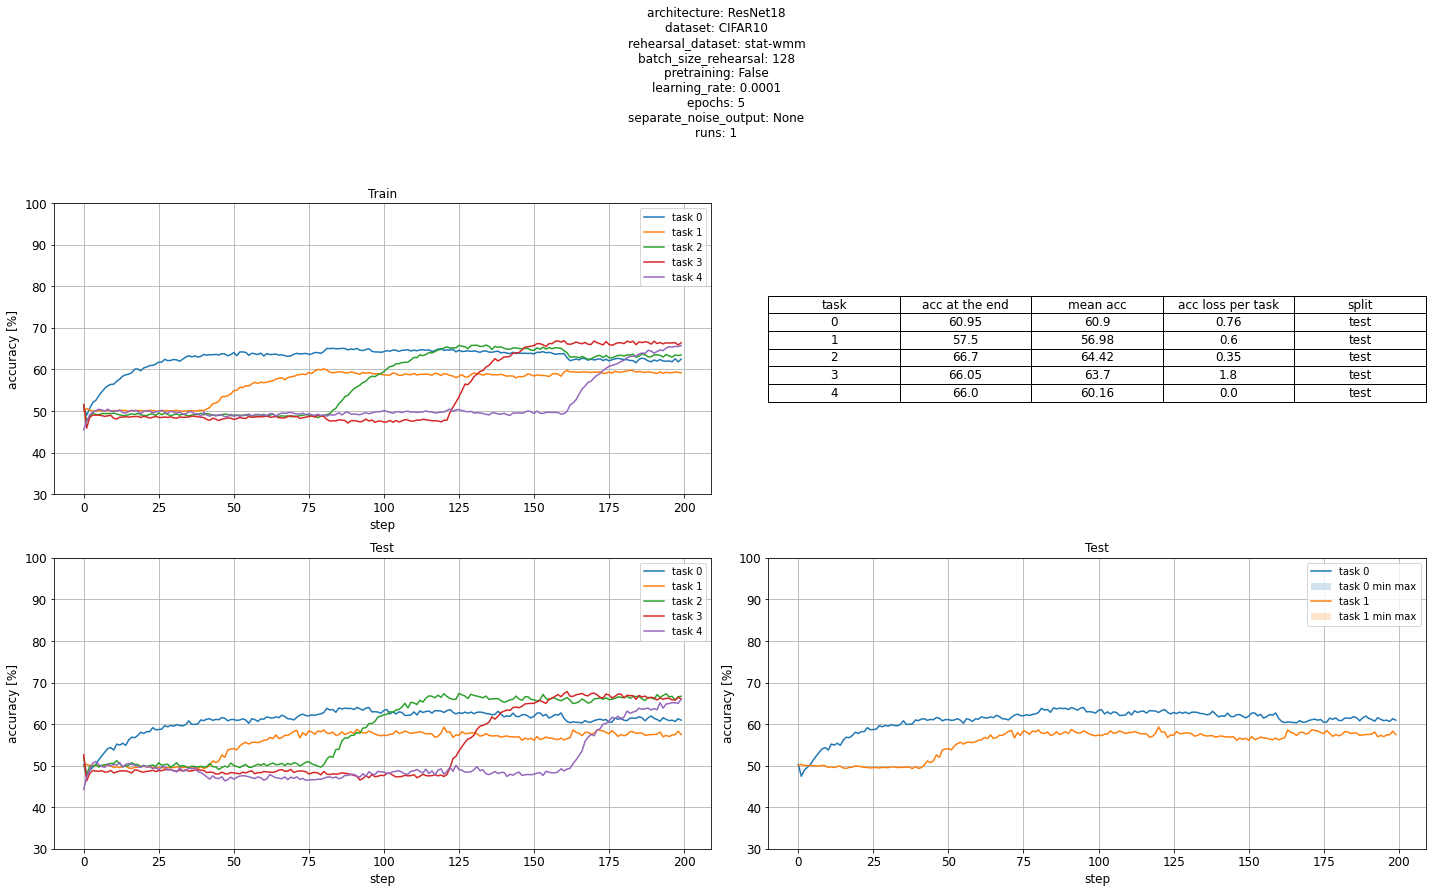

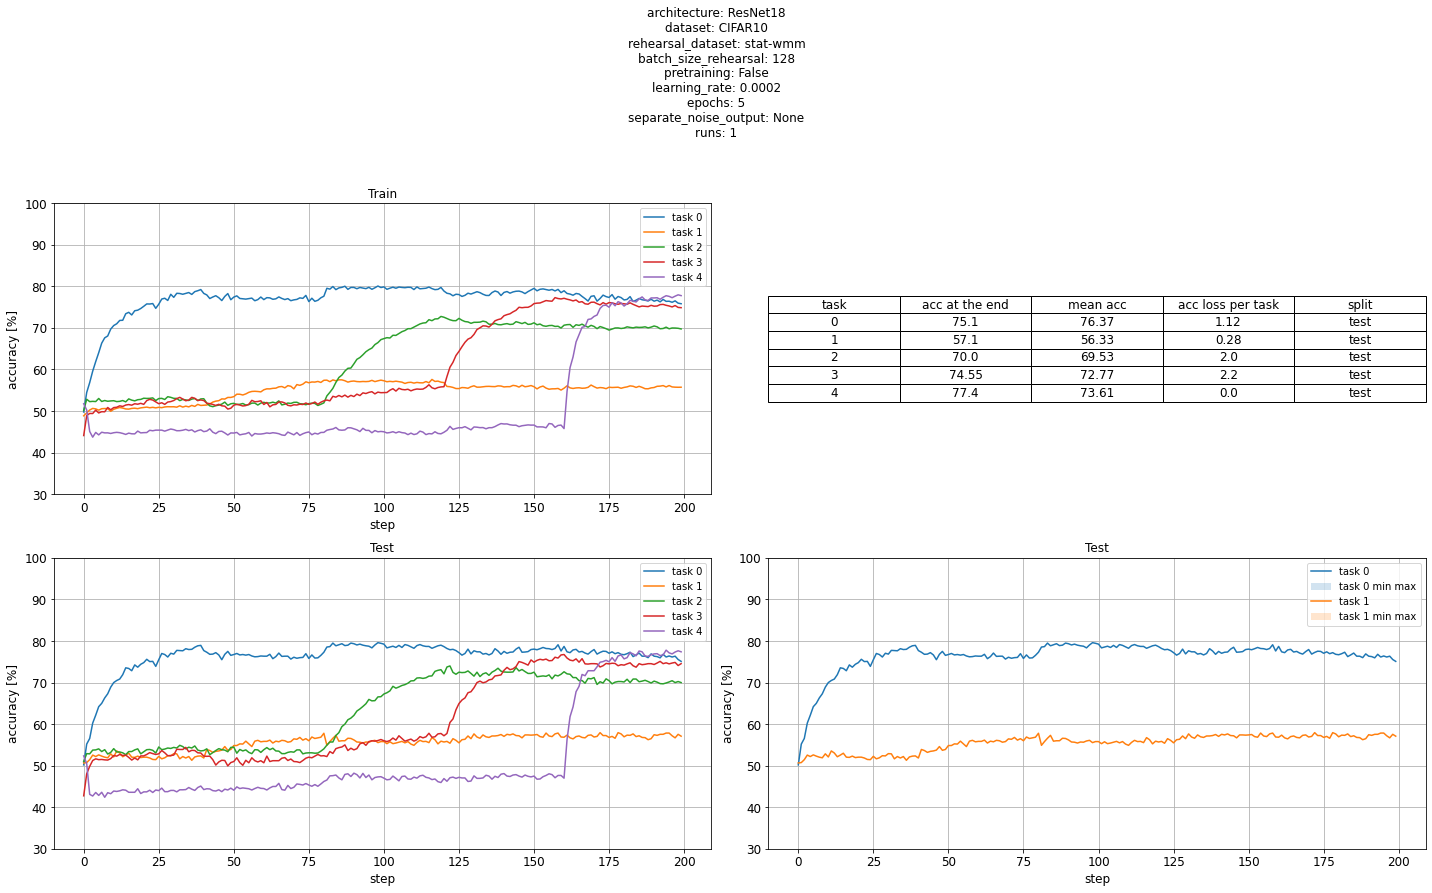

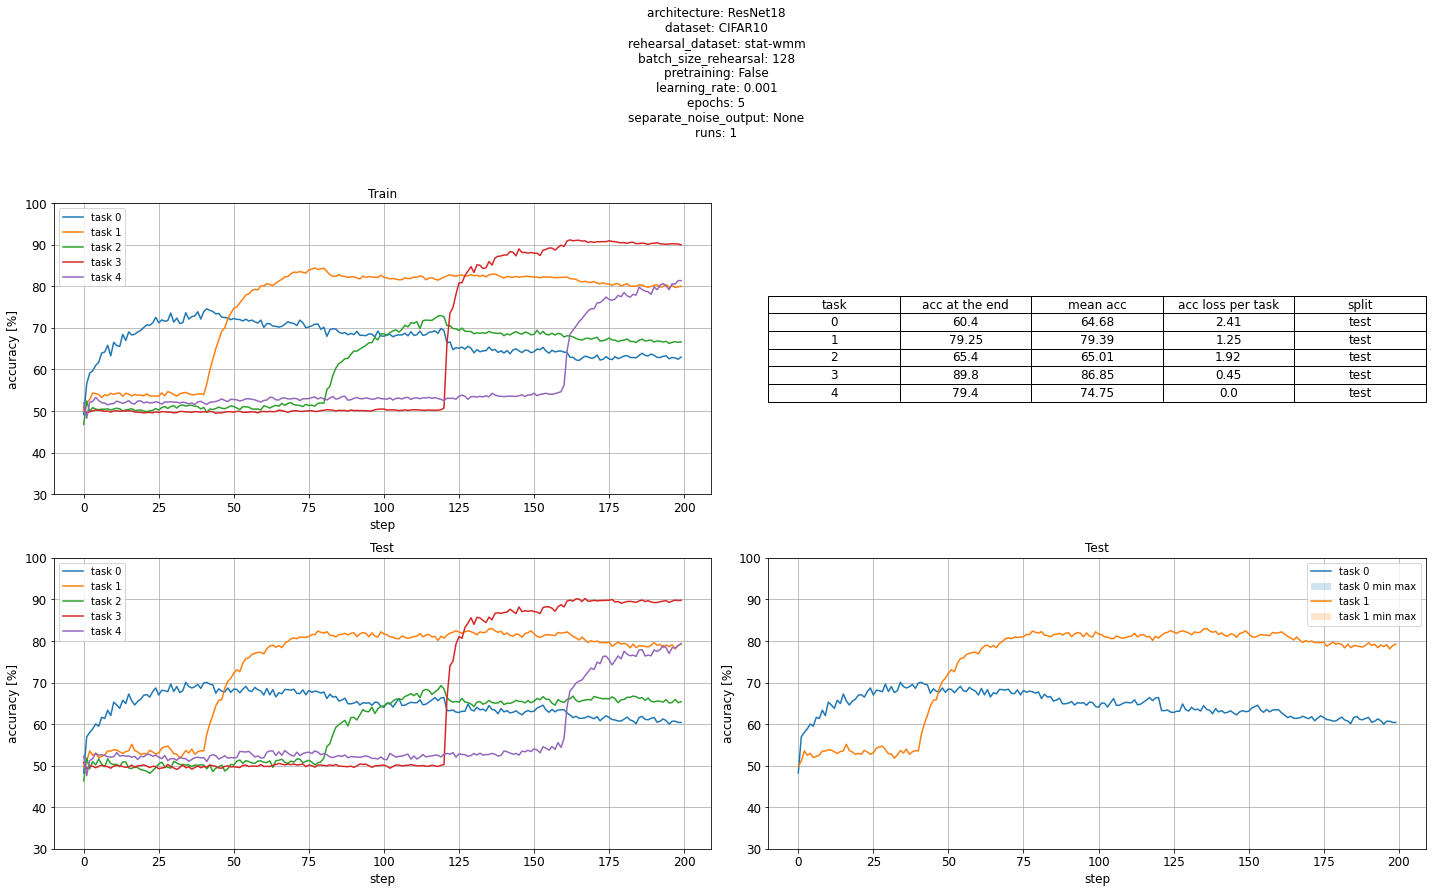

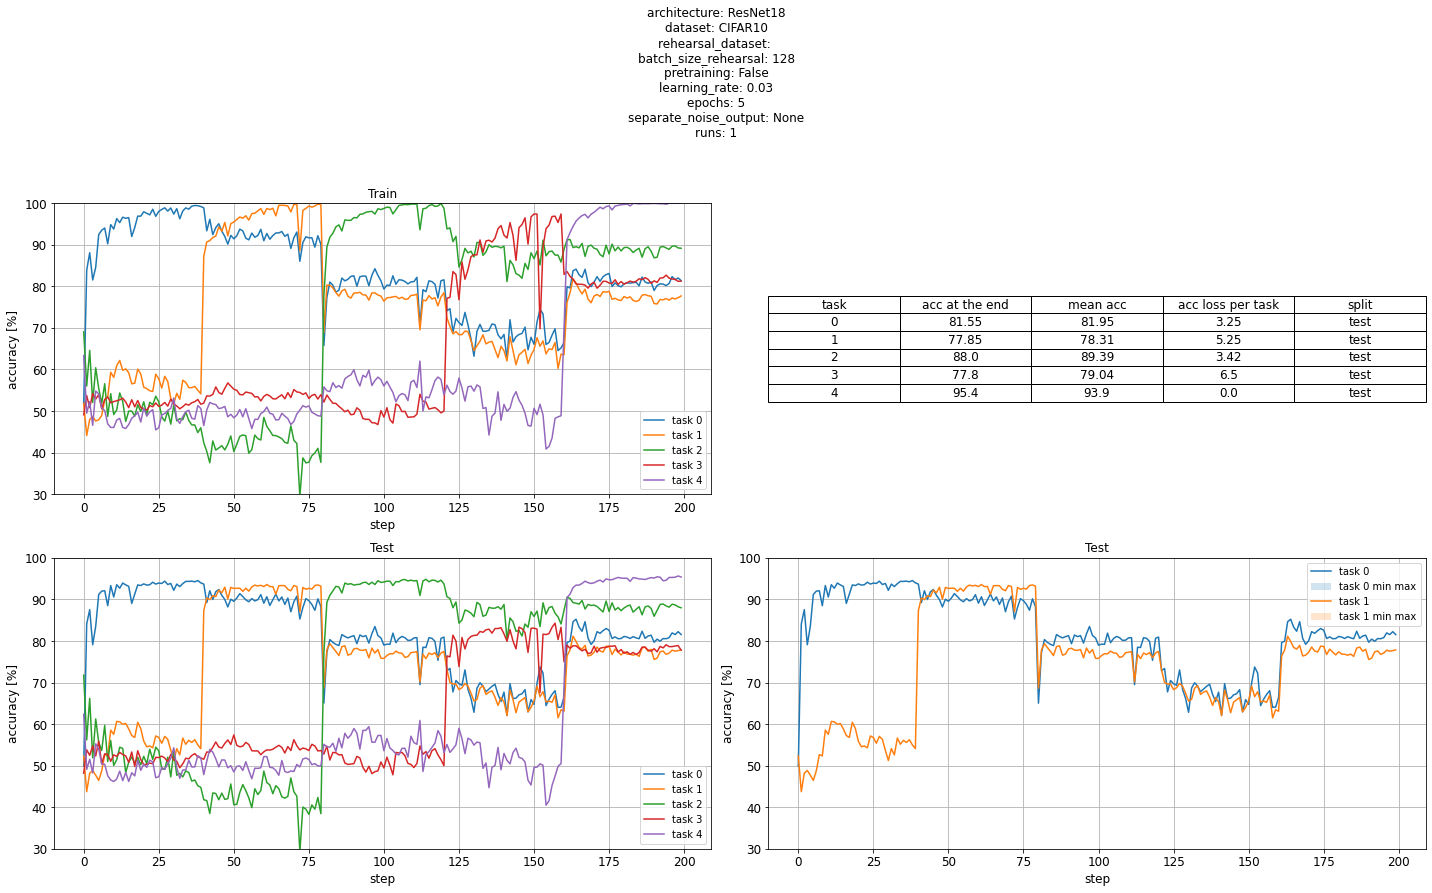

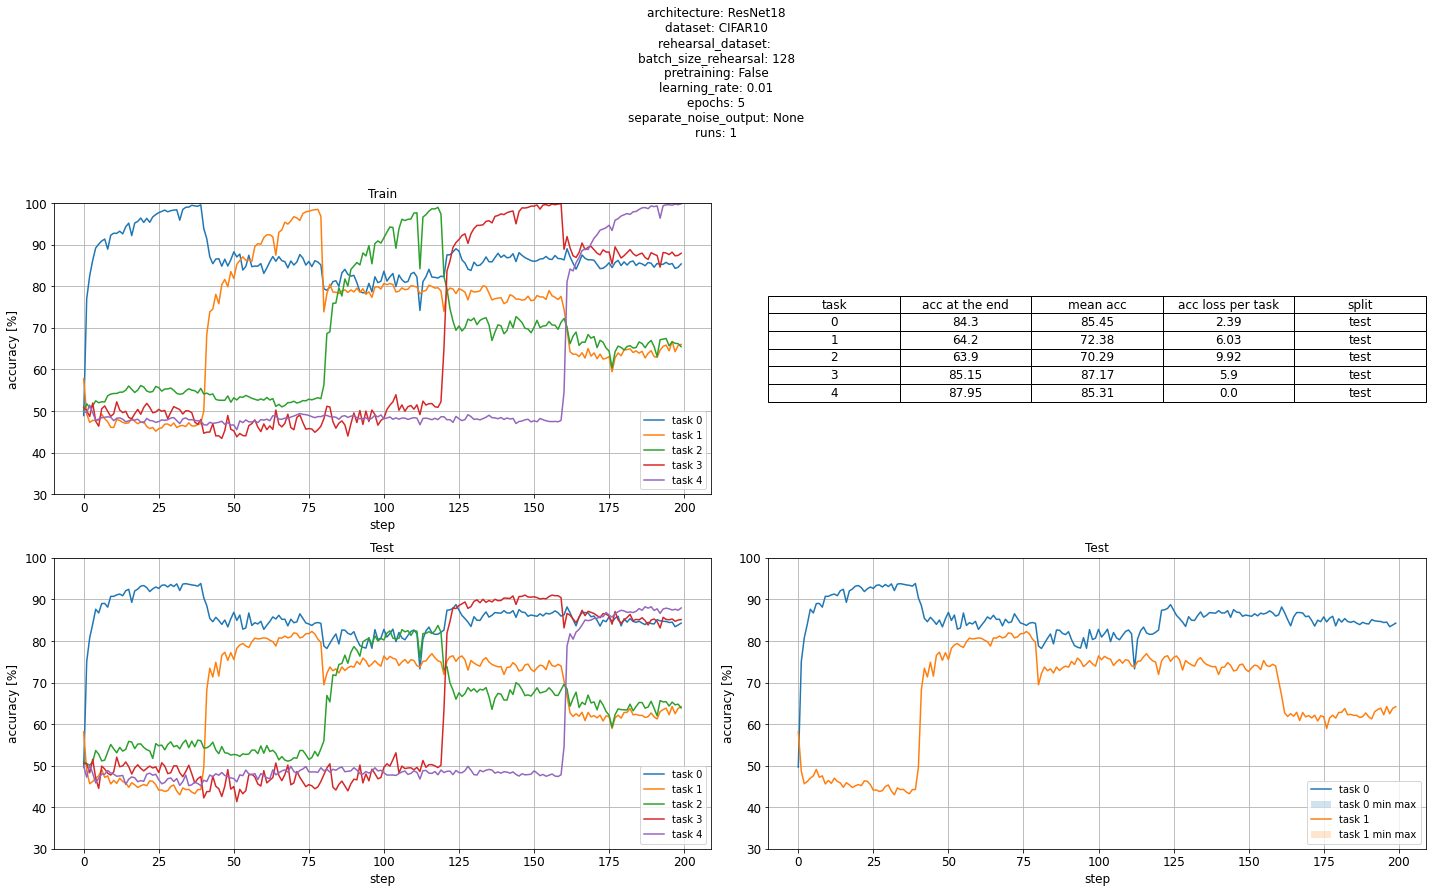

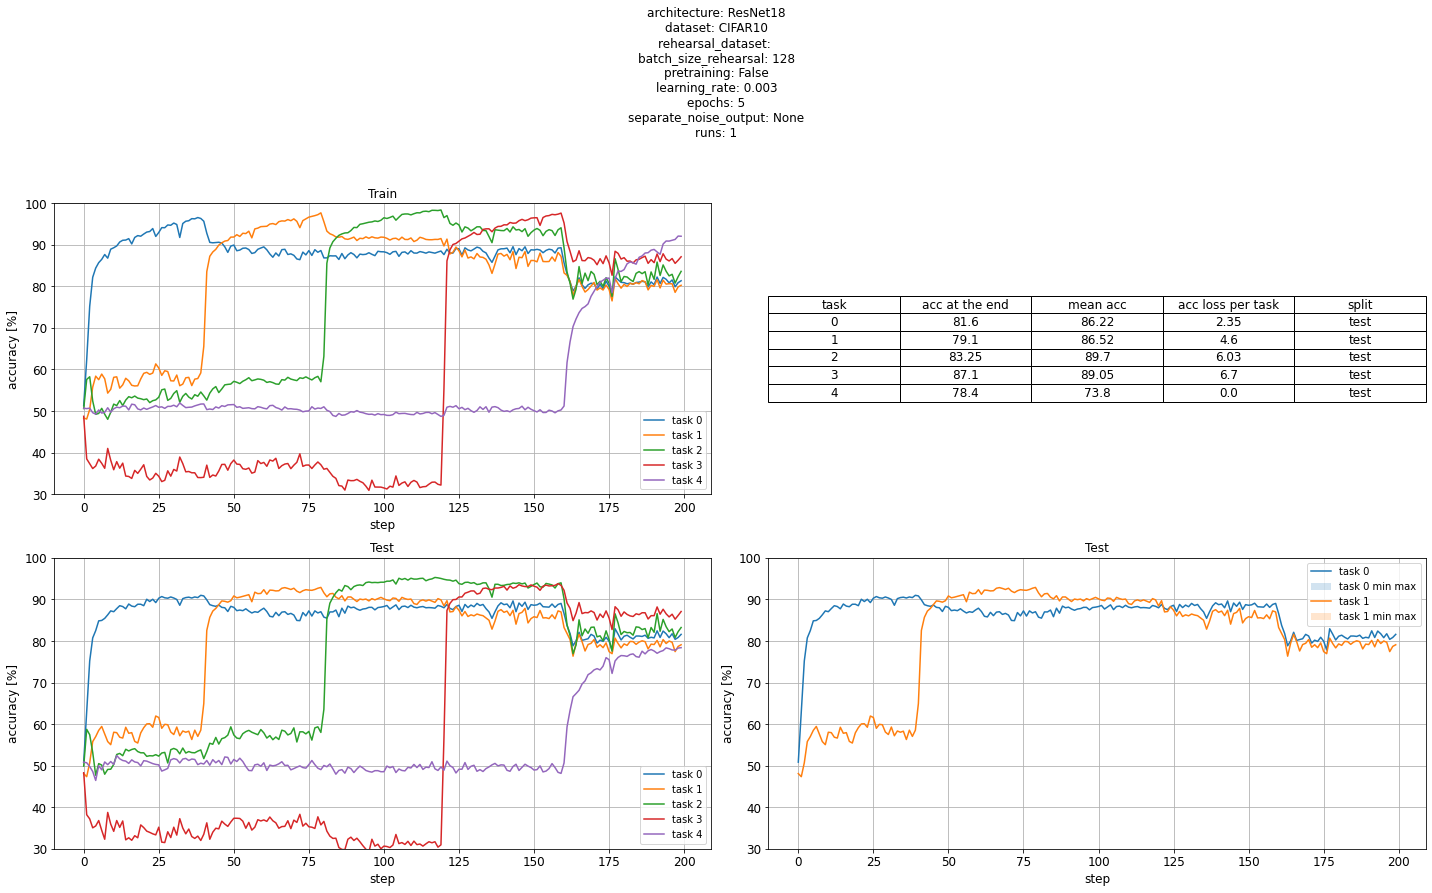

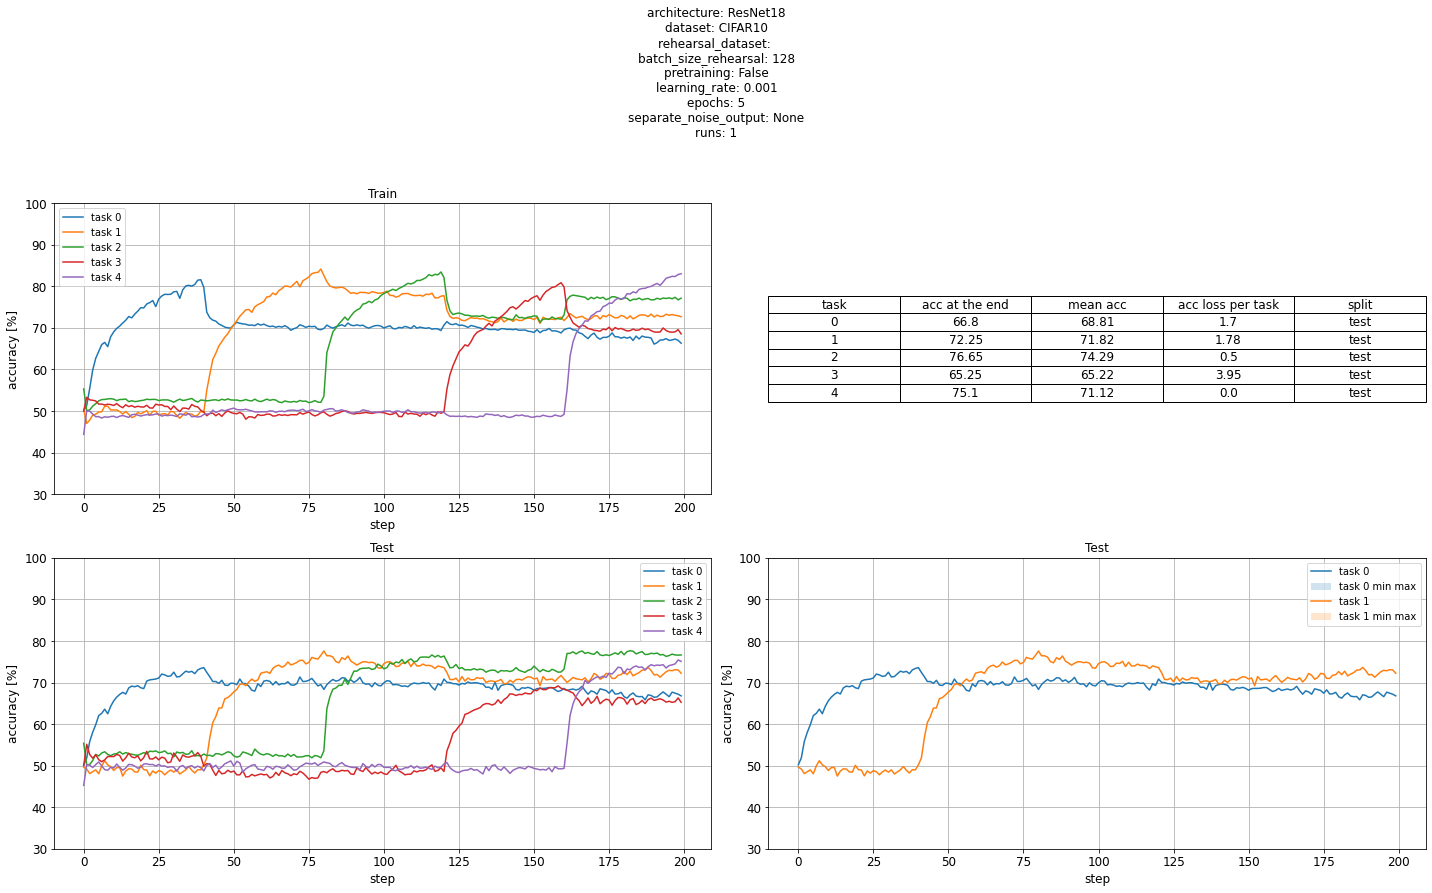

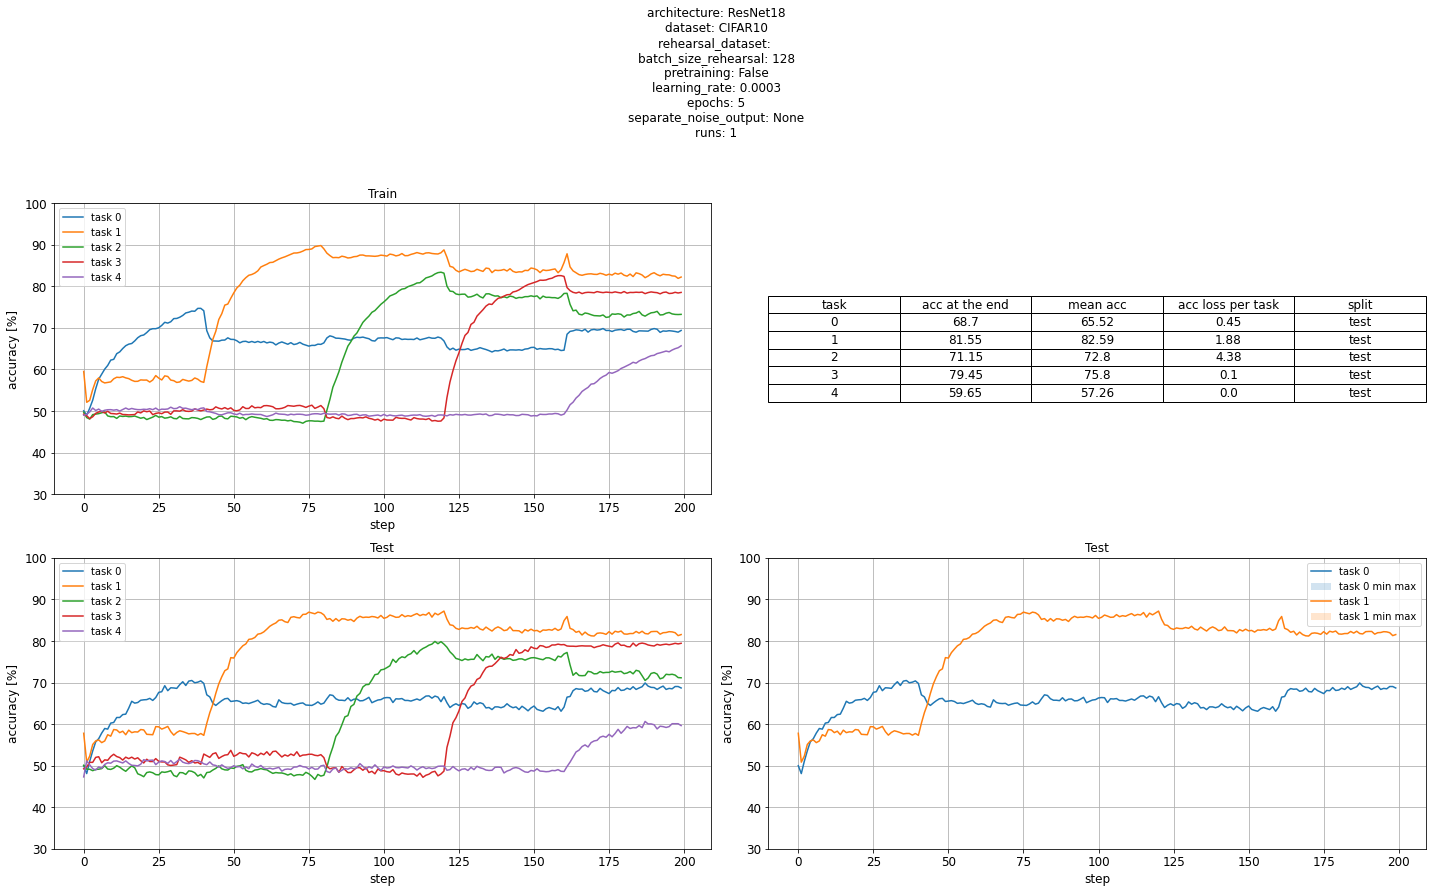

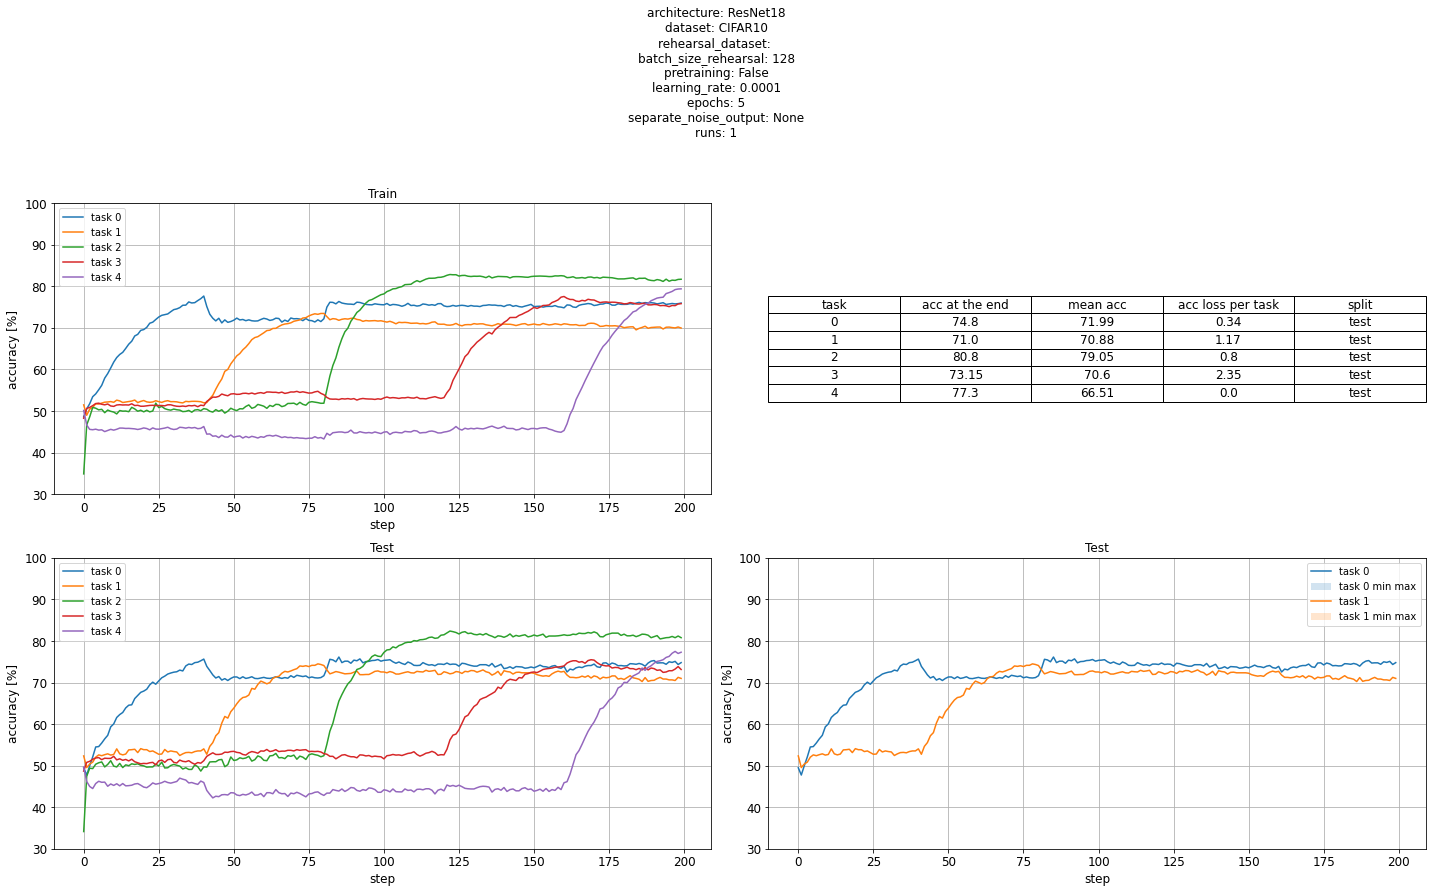

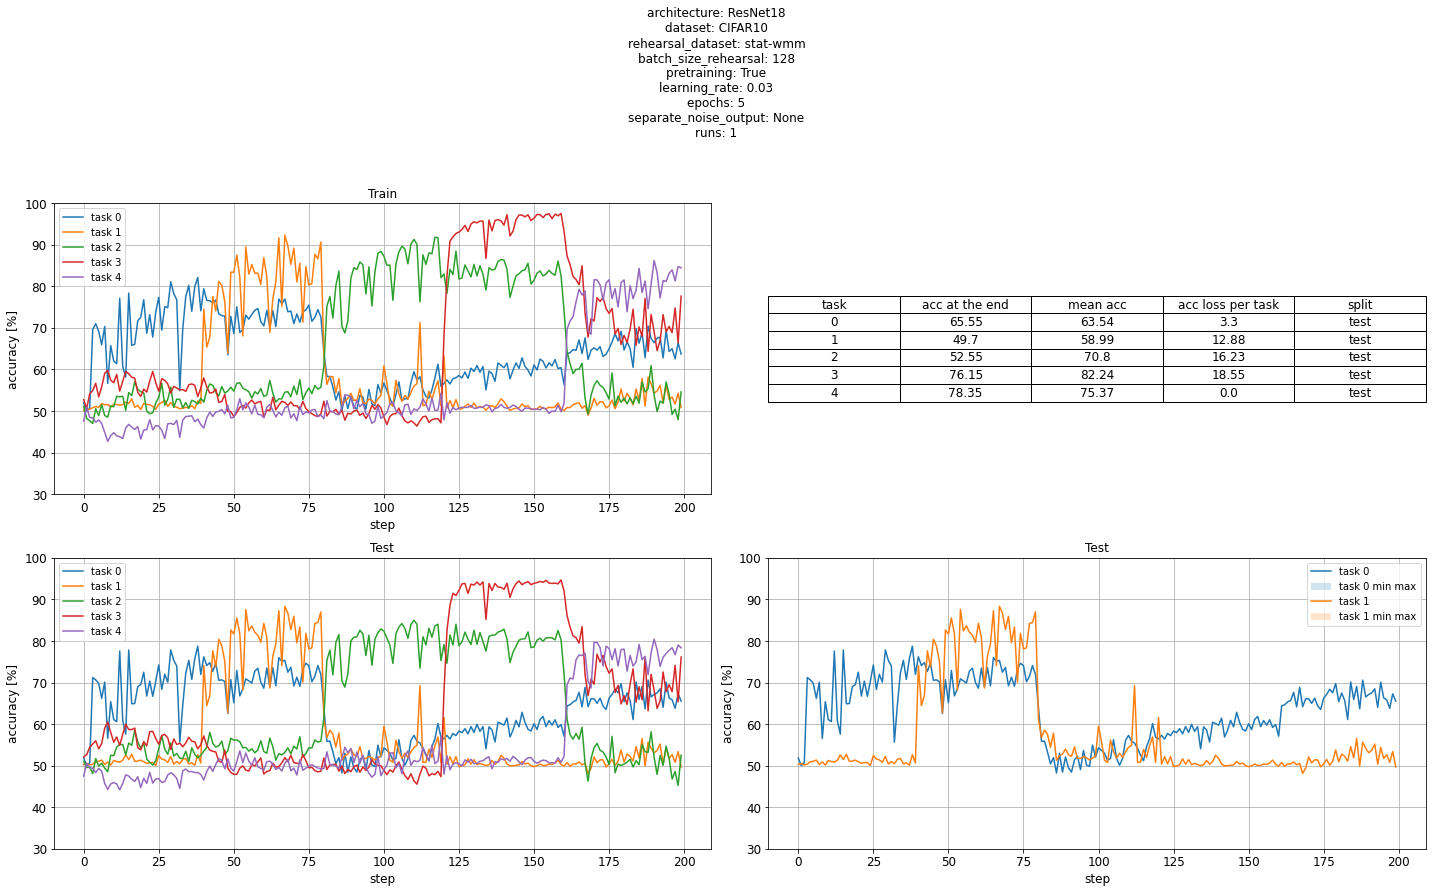

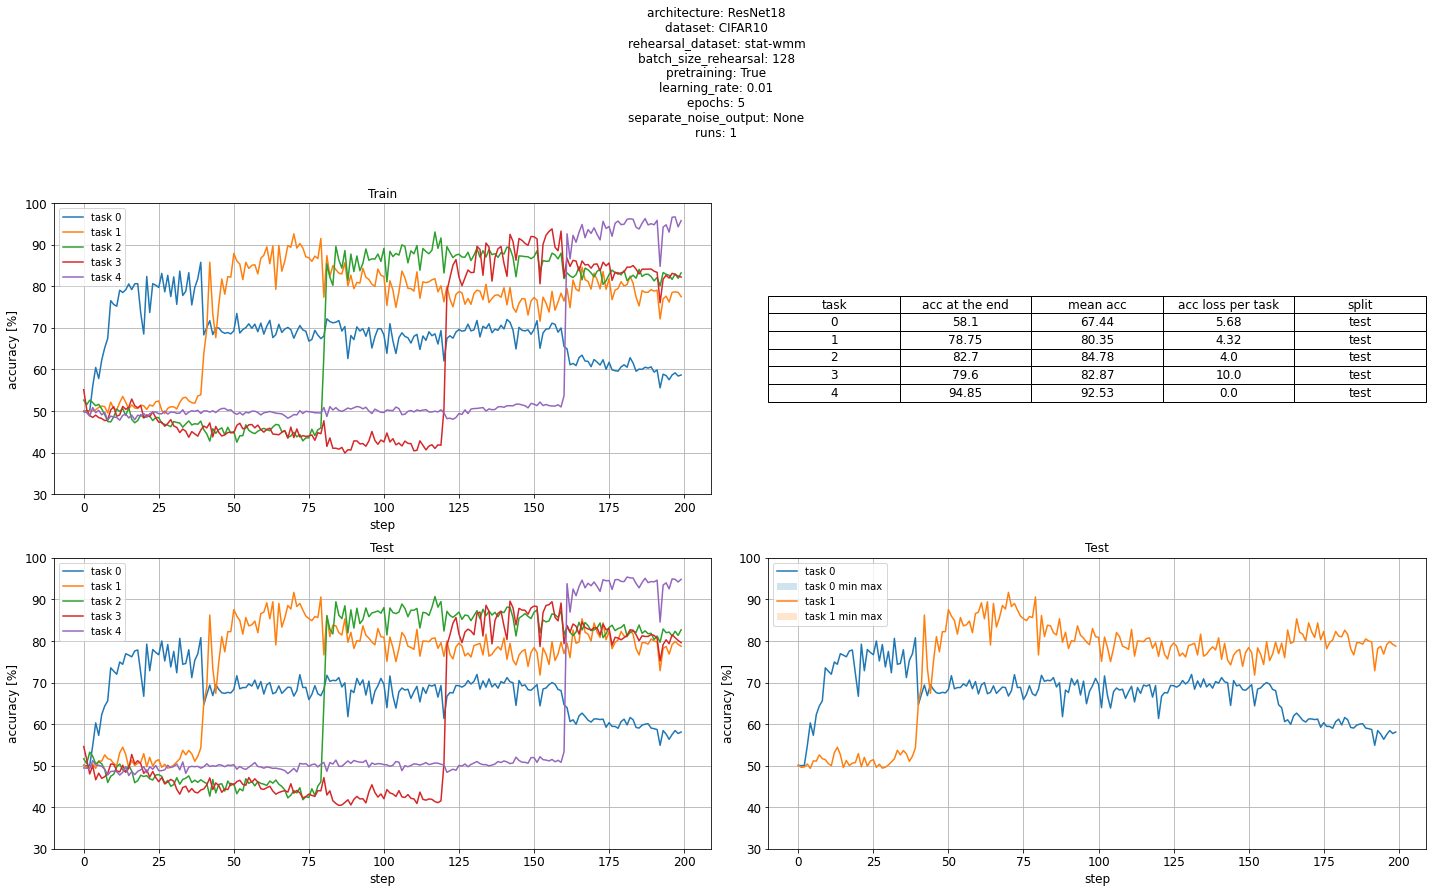

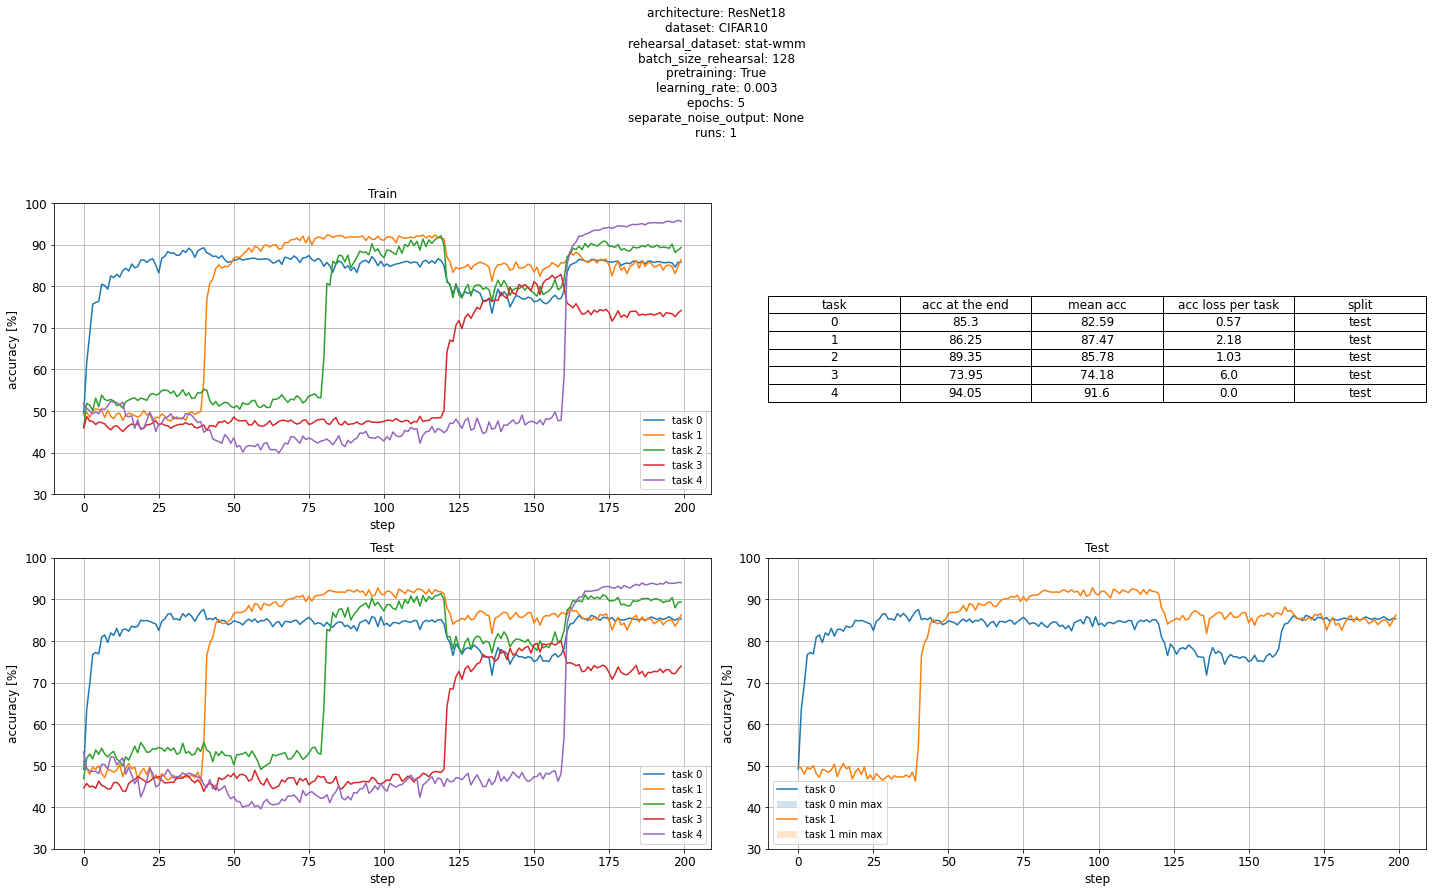

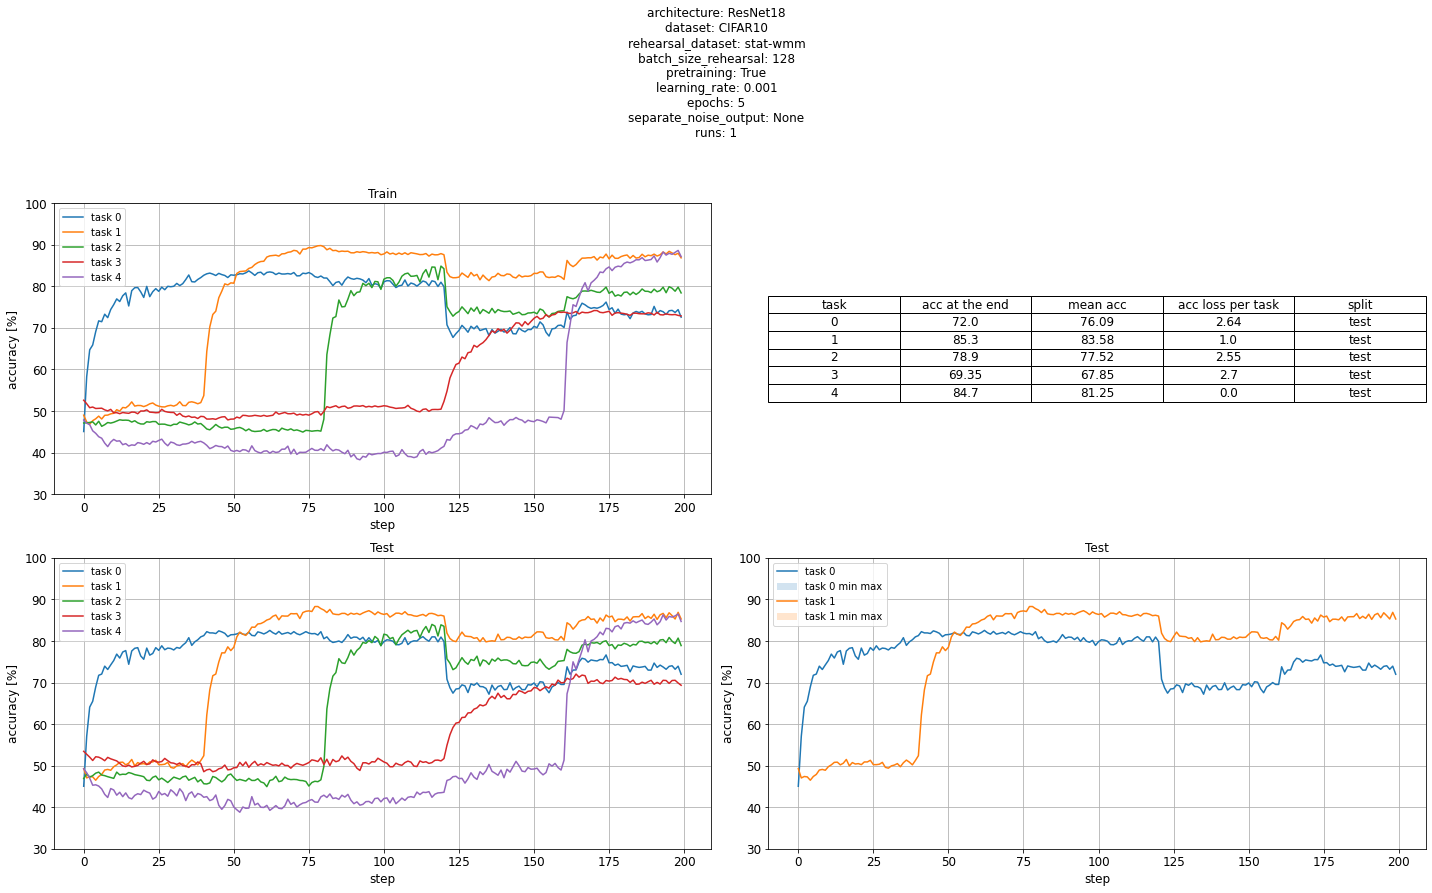

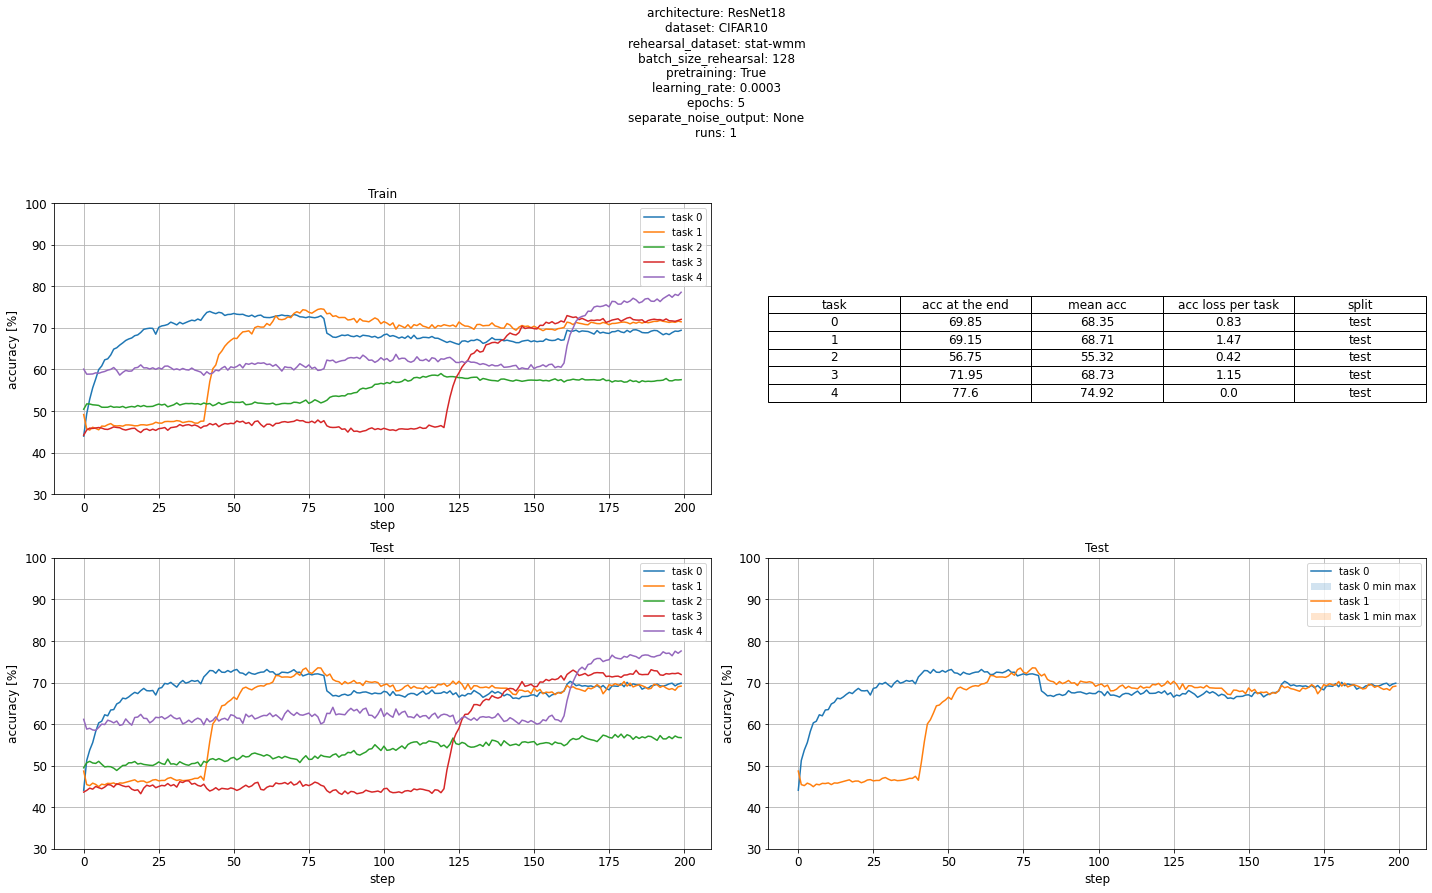

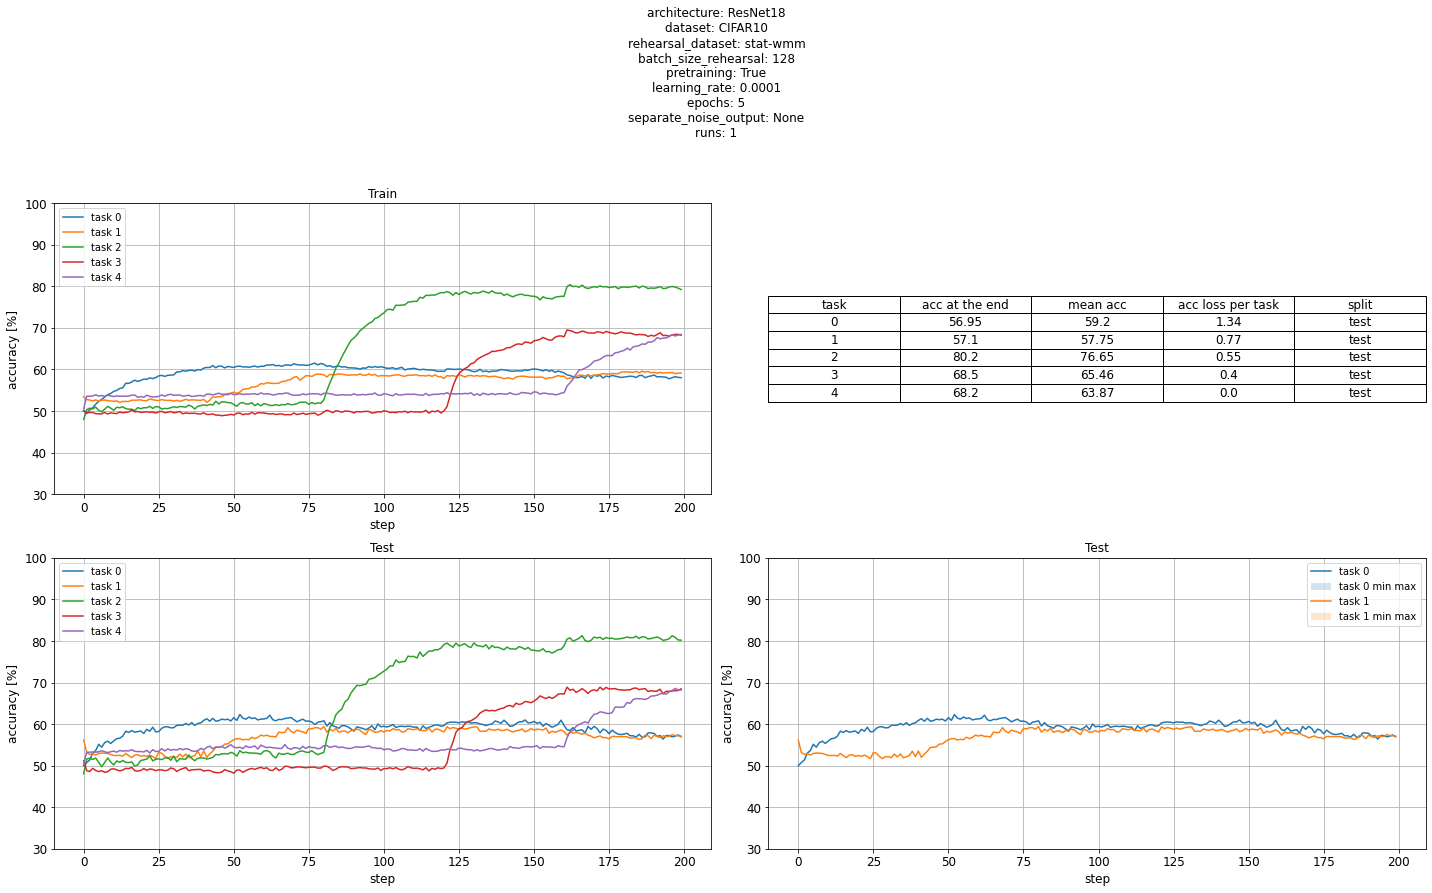

In [10]:
viz.plot_everything()